In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
bike = pd.read_csv('../data/bicycle-hourtime-201905-test.csv', parse_dates=["대여일자"] ,encoding='cp949')

In [3]:
bike["년"] = bike["대여일자"].dt.year
bike["월"] = bike["대여일자"].dt.month
bike["일"] = bike["대여일자"].dt.day

In [7]:
bike.describe

<bound method NDFrame.describe of             대여일자 요일  요일_New  주중주말구분  대여시간  대여소번호           대여소명  지구  지구_New  \
0     2019-05-01  수       3       0     0    101    (구)합정동 주민센터  주거       0   
1     2019-05-01  수       3       0     0    101    (구)합정동 주민센터  주거       0   
2     2019-05-01  수       3       0     3    101    (구)합정동 주민센터  주거       0   
3     2019-05-01  수       3       0     6    101    (구)합정동 주민센터  주거       0   
4     2019-05-01  수       3       0     8    101    (구)합정동 주민센터  주거       0   
...          ... ..     ...     ...   ...    ...            ...  ..     ...   
69242 2019-05-31  금       5       0    19    439        마포어린이공원  공원       2   
69243 2019-05-31  금       5       0    23   3104  e편한세상 신촌4단지 앞  공원       2   
69244 2019-05-31  금       5       0    20    439        마포어린이공원  공원       2   
69245 2019-05-31  금       5       0    23    439        마포어린이공원  공원       2   
69246 2019-05-31  금       5       0    23    439        마포어린이공원  공원       2   

       거치대수  ... 

#### histogram

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

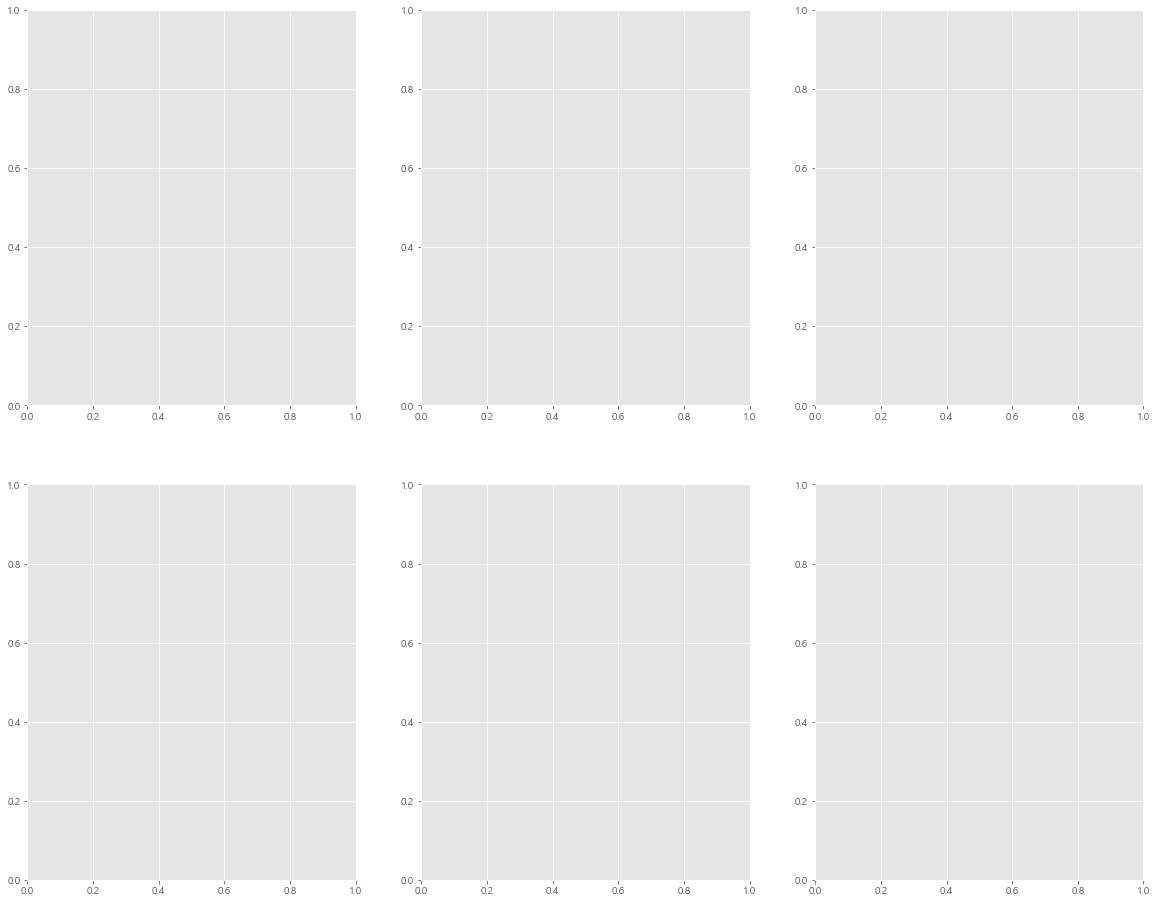

In [8]:
# fig, axes = plt.subplots(nrows=2,ncols=2)
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20, 16)

sns.barplot(data=bike, x="일", y="이용건수",ax=axes[0][0])
sns.barplot(data=bike, x="요일", y="이용건수",ax=axes[0][1] )
sns.barplot(data=bike, x="대여시간", y="이용건수", ax=axes[1][0])
sns.barplot(data=bike, x="연령대코드", y="이용건수", ax=axes[1][1] )
sns.barplot(data=bike, x="주중주말구분", y="이용건수", ax=axes[0][2] )
sns.barplot(data=bike, x="지구", y="이용건수", ax=axes[1][2] )
            
axes[0][0].set(ylabel='이용건수',title="이용건수")
axes[0][1].set(xlabel='요일', ylabel='이용건수',title="요일별 이용건수")
axes[1][0].set(xlabel='대여시간', ylabel='이용건수',title="대여시간대별 이용건수")
axes[1][1].set(xlabel='연령대코드', ylabel='이용건수',title="연령대코드별 이용건수")
axes[0][2].set(xlabel='주중주말구분', ylabel='이용건수',title="주중주말구분별 이용건수")
axes[1][2].set(xlabel='지구', ylabel='이용건수',title="지구별 이용건수")
# ax1.set(ylabel='이용건수',title="일별 이용건수")
# ax2.set(xlabel='요일',title="요일별 이용건수")
# ax3.set(xlabel='대여시간', title="시간대별 이용건수")
# ax4.set(xlabel='운동량별', title="운동량별 이용건수")

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=bike,y="이용건수",orient="v",ax=axes[0][0])
sns.boxplot(data=bike,y="이용건수",x="주중주말구분",orient="v",ax=axes[0][1])
sns.boxplot(data=bike,y="이용건수",x="대여시간",orient="v",ax=axes[1][0])
sns.boxplot(data=bike,y="이용건수",x="대여구분코드_new",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='이용건수',title="이용건수")
axes[0][1].set(xlabel='요일', ylabel='Count',title="주중주말구분 대여량")
axes[1][0].set(xlabel='대여시간', ylabel='Count',title="시간별 대여량")
axes[1][1].set(xlabel='대여구분코드_new', ylabel='Count',title="대여구분코드에 따른 대여량")

In [ ]:
bike["요일"].value_counts()

## 대여시간별 그래프

In [ ]:
fig,(ax1,ax2,ax3,ax4,ax5, ax6, ax7)= plt.subplots(nrows=7)
fig.set_size_inches(18,40)

sns.pointplot(data=bike, x="대여시간", y="이용건수", ax=ax1)

sns.pointplot(data=bike, x="대여시간", y="이용건수", hue="성별_New", ax=ax2)

sns.pointplot(data=bike, x="대여시간", y="이용건수", hue="요일_New", ax=ax3)

sns.pointplot(data=bike, x="대여시간", y="이용건수", hue="연령대코드_New", ax=ax4)

sns.pointplot(data=bike, x="대여시간", y="이용건수", hue="대여구분코드_new", ax=ax5)

sns.pointplot(data=bike, x="대여시간", y="이용건수", hue="주중주말구분", ax=ax6)

sns.pointplot(data=bike, x="대여시간", y="이용건수", hue="지구", ax=ax7)

## 상관관계 분석

In [ ]:
corrMatt = bike[["요일_New", "대여시간", "대여소번호", "대여소 주소(행정동)", "거치대수", "대여구분코드_new", "성별_New","연령대코드_New","이용건수","사용시간", "지구","주중주말구분"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [ ]:
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(bike["이용건수"], ax=axes[0][0])
stats.probplot(bike["이용건수"], dist='norm', fit=True, plot=axes[0][1])
#sns.distplot(np.log(trainWithoutOutliers["이용건수"]), ax=axes[1][0])
#stats.probplot(np.log1p(trainWithoutOutliers["이용건수"]), dist='norm', fit=True, plot=axes[1][1])

## pivot data 생성

In [ ]:
bike.columns

In [ ]:
bike_sum_1 = pd.pivot_table(bike, index=["지구","주중주말구분"],values=["이용건수"],aggfunc=np.sum)
bike_sum_1.rename(columns={'이용건수':'이용건수합계'}, inplace=True)
# bike_sum['이용률'] = bike_sum['이용건수합계']/bike_sum['거치대수합계']
bike_sum_1

In [ ]:
# bike_sum_2 = bike.groupby(bike['대여소번호'])
bike_sum_2 = pd.pivot_table(bike, index=["지구","대여소번호"],values=["거치대수"],aggfunc=np.average)
# bike_sum_1.rename(columns={'이용건수':'이용건수합계'}, inplace=True)
# bike_sum['이용률'] = bike_sum['이용건수합계']/bike_sum['거치대수합계']
bike_sum_2
bike_sum_3 = pd.pivot_table(bike_sum_2,index=["지구"], values=["거치대수"],aggfunc=np.sum)
bike_sum_3

In [ ]:
bike_sum_1.columns

In [ ]:
bike_sum_3['거치대수']

In [ ]:
bike_sum_1['지구별거치대수']= pd.Series([266,355,474,266,355,474], index=[('공원',0),('상업',0),('주거',0),('공원',1),('상업',1),('주거',1)])
bike_sum_1['이용률']=bike_sum_1['이용건수합계']/bike_sum_1['지구별거치대수']
bike_sum_1 #지구별 
bike_sum_1.sort_values(by=['주중주말구분'],axis=0) # 주중주말구분별

### 주중 이용률에서  상업, 주거 이용률이 공원 이용률보다 1.8배 정도 높다.